In [ ]:
!pip install -q tensorflow matplotlib numpy pandas


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


In [ ]:
def build_model(activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


In [ ]:
def train_model(activation, optimizer_name):
    model = build_model(activation)

    if optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    elif optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam()

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        epochs=5,
        validation_data=(X_test, y_test),
        verbose=1
    )
    return history


In [ ]:
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for act in activations:
    print(f"\nTraining with activation: {act}")
    history = train_model(act, 'adam')
    results[act] = history



Training with activation: sigmoid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8059 - loss: 0.8312 - val_accuracy: 0.9200 - val_loss: 0.2871
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9202 - loss: 0.2728 - val_accuracy: 0.9362 - val_loss: 0.2225
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9398 - loss: 0.2087 - val_accuracy: 0.9466 - val_loss: 0.1828
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9531 - loss: 0.1632 - val_accuracy: 0.9535 - val_loss: 0.1544
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9613 - loss: 0.1360 - val_accuracy: 0.9603 - val_loss: 0.1356

Training with activation: tanh
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8625 - loss: 0.5087 - val_accuracy: 0.9326 - val_loss: 0.2353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9385 - loss: 0.2109 - val_accuracy: 0.9513 - val_loss: 0.1705
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy:

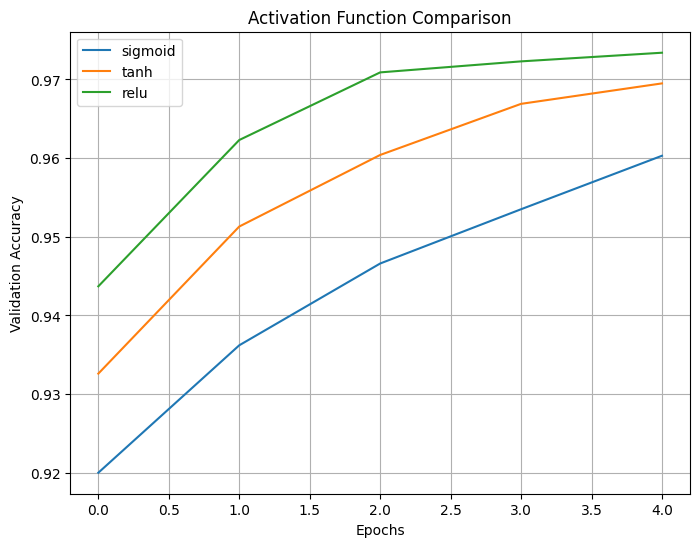

In [ ]:
plt.figure(figsize=(8,6))

for act in activations:
    plt.plot(results[act].history['val_accuracy'], label=act)

plt.title("Activation Function Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
optimizers = ['sgd', 'adam']
opt_results = {}

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    history = train_model('relu', opt)
    opt_results[opt] = history



Training with optimizer: sgd
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6106 - loss: 1.6309 - val_accuracy: 0.8725 - val_loss: 0.5581
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.5160 - val_accuracy: 0.8975 - val_loss: 0.4002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8892 - loss: 0.4056 - val_accuracy: 0.9050 - val_loss: 0.3499
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.3543 - val_accuracy: 0.9116 - val_loss: 0.3230
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9067 - loss: 0.3286 - val_accuracy: 0.9162 - val_loss: 0.3045

Training with optimizer: adam
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8583 - loss: 0.5274 - val_accuracy: 0.9492 - val_loss: 0.1717
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9560 - loss: 0.1522 - val_accuracy: 0.9630 - val_loss: 0.1234
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━

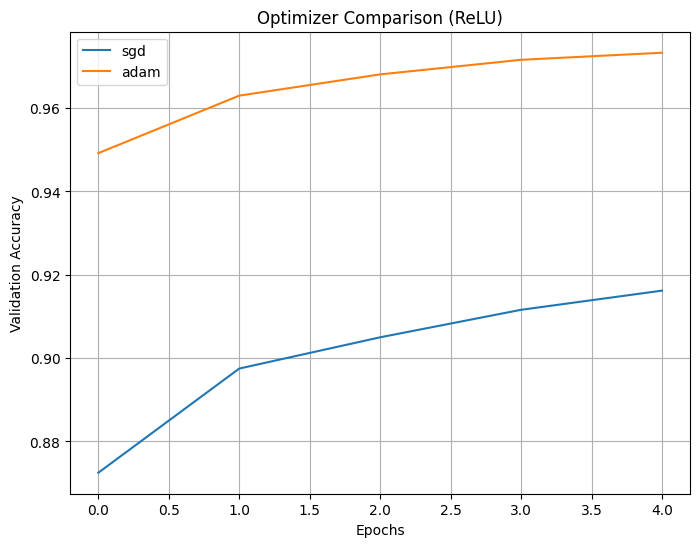

In [ ]:
plt.figure(figsize=(8,6))

for opt in optimizers:
    plt.plot(opt_results[opt].history['val_accuracy'], label=opt)

plt.title("Optimizer Comparison (ReLU)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
